# K means

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.cluster import KMeans


df = pd.read_excel("dataset.xlsx")
df.drop(columns=["Seli", "Tarih"], inplace=True, errors='ignore')

# mccinfo sütunundan dört haneli değeri çekmek için fonksiyon
def extract_mcc(value):
    if pd.isnull(value):
        return np.nan
    match = re.match(r"(\d{4})-", value)
    if match:
        return match.group(1)
    else:
        return np.nan

df['mccinfo'] = df['mccinfo'].apply(extract_mcc)
num_missing_mcc = df['mccinfo'].isnull().sum()
print(f"mccinfo değeri bulunamadığı için silinecek satır sayısı: {num_missing_mcc}")
df = df.dropna(subset=['mccinfo'])

# Sayısal sütunlardaki değerlerin düzenlenmesi
numeric_columns = [
    "bıst100_Kapanış", "bıst100_Açılış", "bıst100_Yüksek", "bıst100_Düşük",
    "Euro_Kapanış", "Euro_Açılış", "Euro_Yüksek", "Euro_Düşük",
    "USD_Kapanış", "USD_Açılış", "USD_Yüksek", "USD_Düşük",
]

def fix_numeric_value(s):
    s = s.replace(',', '.')
    if s.count('.') > 1:
        second_dot = s.find('.', s.find('.') + 1)
        s = s[:second_dot]
    return s

for col in numeric_columns:
    df[col] = df[col].astype(str).apply(fix_numeric_value)
    df[col] = df[col].astype(float)

# Kategorik sütunların kodlanması
categorical_columns = ["Şehir", "İlçe", "mccinfo"]
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Hedef ve özniteliklerin ayrılması
target = "Tek Çekim Komisyon Oranı (Güncel)"
X = df.drop(columns=[target])
y = df[target]


mccinfo değeri bulunamadığı için silinecek satır sayısı: 15


In [2]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# X üzerinde scaler uyguluyoruz. Önce numpy array'e dönüştürüyoruz,
# sonra tekrar DataFrame'e çevirerek orijinal kolon isimlerini koruyoruz.
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)

# -------------------------
# Kümeleme İşlemi (KMeans)
# -------------------------
n_clusters = 5  # Küme sayısı; optimal değeri belirlemek için farklı metrikleri deneyebilirsiniz.
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
# Küme bilgilerini ölçeklendirilmiş veri setine ekliyoruz.
X_scaled['Cluster'] = clusters

print("Kümeleme işlemi tamamlandı. Küme dağılımı:")
print(pd.Series(clusters).value_counts())

Kümeleme işlemi tamamlandı. Küme dağılımı:
1    521
0    391
3    361
2    301
4    118
Name: count, dtype: int64


c:\Users\yagiz\anaconda3\envs\img\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\yagiz\anaconda3\envs\img\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\yagiz\anaconda3\envs\img\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\yagiz\anaconda3\envs\img\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\yagiz\anaconda3\envs\img\lib\subprocess.py", line 1436, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
c

In [3]:
X_scaled

,mccinfo,Şehir,İlçe,basarili_satis_adet,basarili_satis_ciro,basarili_iade_adet,basarili_iade_ciro,Müşteri Skoru,bıst100_Kapanış,bıst100_Açılış,...,Euro_Yüksek,Euro_Düşük,USD_Kapanış,USD_Açılış,USD_Yüksek,USD_Düşük,Yıl,Ay,Gün,Cluster
0,0.755396,0.967742,1.000000,0.238155,6.979632e-02,0.004085,0.015072,0.547799,0.000032,0.000030,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.090909,0.000000,4
1,0.726619,0.967742,0.185484,0.010278,1.792972e-03,0.000041,0.000149,0.719497,0.000014,0.000011,...,0.028358,0.032691,0.032246,0.026333,0.029716,0.031829,0.0,0.272727,0.500000,4
2,0.395683,0.967742,0.995968,0.000277,2.019369e-05,0.000275,0.000091,0.633962,0.000006,0.000008,...,0.030591,0.034938,0.035417,0.031746,0.034037,0.035312,0.0,0.272727,0.366667,4
3,0.539568,0.967742,0.419355,0.000002,1.247152e-05,0.000000,0.000000,0.321384,0.000010,0.000005,...,0.039214,0.042464,0.037482,0.036121,0.036784,0.037825,0.0,0.272727,0.866667,4
4,1.000000,0.967742,0.943548,0.000823,4.583453e-03,0.000021,0.000266,0.115723,0.000010,0.000005,...,0.039214,0.042464,0.037482,0.036121,0.036784,0.037825,0.0,0.272727,0.866667,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1702,0.266187,0.967742,0.588710,0.000005,7.775909e-06,0.000000,0.000000,0.477987,0.002115,0.002236,...,0.896866,0.905611,0.940369,0.942078,0.937406,0.942903,1.0,0.545455,0.100000,1
1703,0.467626,0.967742,0.588710,0.000140,1.195461e-04,0.000021,0.000090,0.871069,0.002115,0.002236,...,0.896866,0.905611,0.940369,0.942078,0.937406,0.942903,1.0,0.545455,0.100000,1
1704,0.424460,0.967742,0.588710,0.000009,7.806953e-06,0.000000,0.000000,0.442767,0.002115,0.002236,...,0.896866,0.905611,0.940369,0.942078,0.937406,0.942903,1.0,0.545455,0.100000,1
1705,0.827338,0.967742,0.588710,0.000000,2.003045e-07,0.000000,0.000000,0.704403,0.002174,0.002350,...,0.931167,0.939223,0.960265,0.961837,0.957230,0.963956,1.0,0.545455,0.566667,1


In [4]:
from xgboost import XGBRegressor

# Her kümeden elde edilen tahminleri aynı dizide toplamak için
all_predictions = pd.Series(index=y.index, dtype=float)
cluster_metrics = {}

for cluster in np.unique(clusters):
    print(f"\nCluster {cluster} için model eğitimi başlatılıyor...")
    # Bu kümeye ait verileri seçiyoruz; 'Cluster' sütununu çıkarıyoruz.
    cluster_mask = X_scaled['Cluster'] == cluster
    X_cluster = X_scaled.loc[cluster_mask].drop(columns=['Cluster'])
    y_cluster = y.loc[cluster_mask]
    

    if len(X_cluster) < 10:
        print(f"Uyarı: Cluster {cluster} için örnek sayısı {len(X_cluster)}, CV ayarı örnek sayısına göre yapılıyor.")
        kf_cluster = KFold(n_splits=len(X_cluster), shuffle=True, random_state=42)
    else:
        kf_cluster = KFold(n_splits=10, shuffle=True, random_state=42)

    xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
    y_pred_cluster = cross_val_predict(xgb_model, X_cluster, y_cluster, cv=kf_cluster)
    
    
    mae = mean_absolute_error(y_cluster, y_pred_cluster)
    mape = mean_absolute_percentage_error(y_cluster, y_pred_cluster)
    r2 = r2_score(y_cluster, y_pred_cluster)
    
    cluster_metrics[cluster] = {'MAE': mae, 'MAPE': mape, 'R2': r2}
    print(f"Cluster {cluster} sonuçları:")
    print(f"MAE: {mae:.4f}")
    print(f"MAPE: {mape:.4f}")
    print(f"R2: {r2:.4f}")
    
    # Bu kümedeki tahminleri orijinal indeksleri ile saklıyoruz.
    all_predictions.loc[cluster_mask] = y_pred_cluster


overall_mae = mean_absolute_error(y, all_predictions)
overall_mape = mean_absolute_percentage_error(y, all_predictions)
overall_r2 = r2_score(y, all_predictions)

print("\nGenel model sonuçları:")
print(f"Genel MAE: {overall_mae:.4f}")
print(f"Genel MAPE: {overall_mape:.4f}")
print(f"Genel R2: {overall_r2:.4f}")



Cluster 0 için model eğitimi başlatılıyor...
Cluster 0 sonuçları:
MAE: 0.3632
MAPE: 0.0817
R2: 0.4209

Cluster 1 için model eğitimi başlatılıyor...
Cluster 1 sonuçları:
MAE: 0.4341
MAPE: 0.1013
R2: 0.1337

Cluster 2 için model eğitimi başlatılıyor...
Cluster 2 sonuçları:
MAE: 0.3697
MAPE: 0.1008
R2: 0.5904

Cluster 3 için model eğitimi başlatılıyor...
Cluster 3 sonuçları:
MAE: 0.3584
MAPE: 0.0880
R2: 0.5877

Cluster 4 için model eğitimi başlatılıyor...
Cluster 4 sonuçları:
MAE: 0.4413
MAPE: 0.1133
R2: 0.6790

Genel model sonuçları:
Genel MAE: 0.3906
Genel MAPE: 0.0947
Genel R2: 0.4973


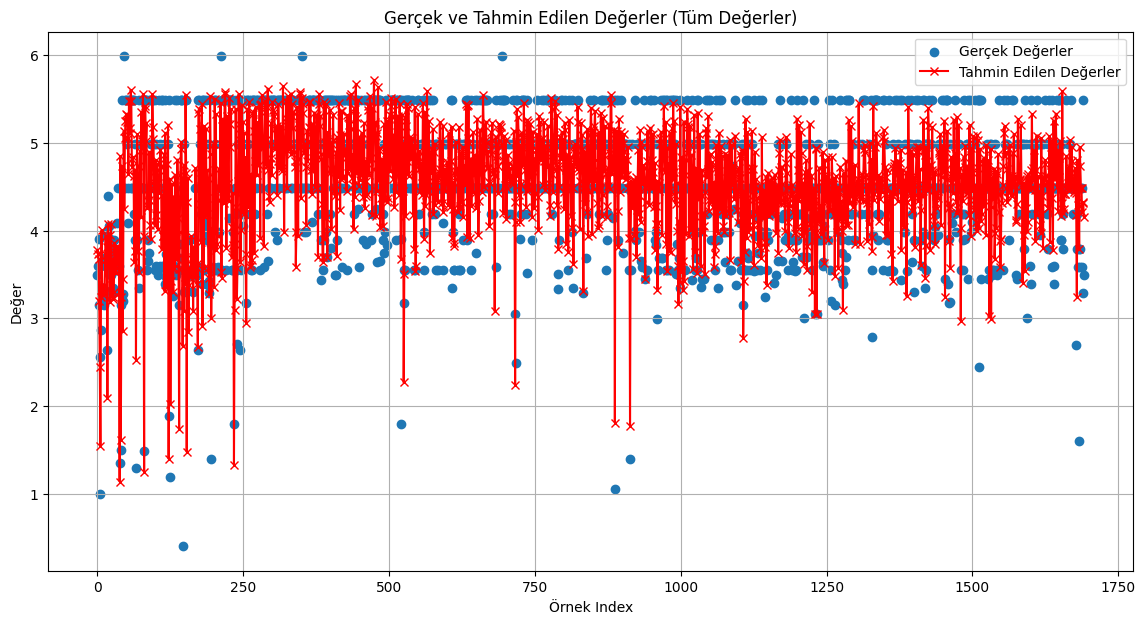

In [5]:
plt.figure(figsize=(14,7))
plt.scatter(np.arange(len(y)), y, label="Gerçek Değerler", marker="o")
plt.plot(np.arange(len(y)), all_predictions.sort_index(), label="Tahmin Edilen Değerler", marker="x", color="red", linestyle="-")
plt.xlabel("Örnek Index")
plt.ylabel("Değer")
plt.title("Gerçek ve Tahmin Edilen Değerler (Tüm Değerler)")
plt.legend()
plt.grid(True)
plt.show()